# Deep Learning
-----------------
## **_Convolutional Neural Network_**
In the next cell, I want to learn more about Conv layers.

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10
from torchvision.transforms import v2
from torchvision import transforms

In [ ]:
train_data = CIFAR10(
    root= "data",
    download= True,
    transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])
    )
test_data = CIFAR10(
    root= "data",
    train= False,
    download= True,
    transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])
    )

100%|██████████| 170498071/170498071 [00:03<00:00, 43325670.80it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [138]:
def print_iamges(samples, nrows, ncols,scale, titles = False):
    plt.rcParams.update({'font.size': 8})
    fig, axes = plt.subplots(
        nrows=nrows, ncols=ncols, figsize=(nrows * scale,ncols * scale))
    axes = axes.ravel()
    i = 0
    for idx,ax in enumerate(axes):
          ax.figure
          ax.imshow(samples[int(idx)], cmap="gray")
          if titles : ax.set_title(titles[int(idx/2)])



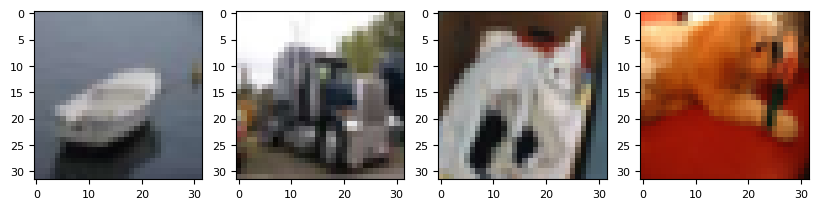

In [140]:
train_x, train_y = train_data.data, train_data.targets
samples = torch.randint(low= 0,high = 6000,size = (1,4)).tolist()[0]
len(train_x[samples])
print_iamges(train_x[samples], 1, 4,10)

In [165]:
kernel = torch.Tensor([[[[1, 1, 1], [0, 0, 0], [-1, -1, -1]]],[[[1, 0, -1], [1, 0, -1], [1, 0, -1]]]])
kernel.requires_grad = False


conv = nn.Conv2d(in_channels = 1, out_channels=2, kernel_size=3, stride=1, padding=1, bias=False)

with torch.no_grad():
    conv.weight = nn.Parameter(kernel)

x = v2.Compose([v2.ToTensor()])(torch.tensor(train_x[samples]).permute(0,3,1,2))
result = conv(x[:,0:1,:,:].float())

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


torch.Size([4, 2, 32, 32]) torch.Size([4, 3, 32, 32])


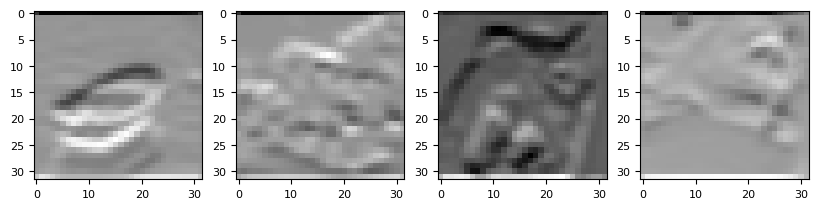

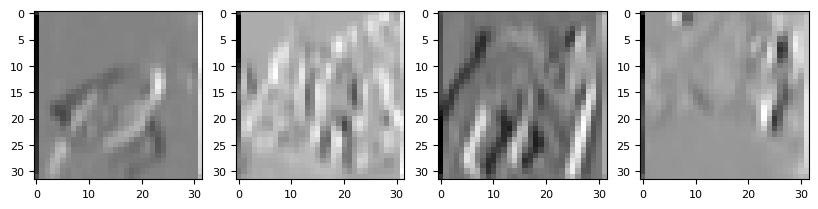

In [166]:
print_iamges(list(result.permute(0,2,3,1).detach().numpy()[:,:,:,0]),1,4,10)
print_iamges(list(result.permute(0,2,3,1).detach().numpy()[:,:,:,1]),1,4,10)
print(result.shape,x.shape)

In [167]:
kernel = torch.Tensor([[[[1, 1, 1], [0, 0, 0], [-1, -1, -1]]],[[[1, 0, -1], [1, 0, -1], [1, 0, -1]]]])
kernel.requires_grad = False


conv = nn.Conv2d(in_channels = 1, out_channels=2, kernel_size=3, stride=2, padding=1, bias=False)

with torch.no_grad():
    conv.weight = nn.Parameter(kernel)

x = v2.Compose([v2.ToTensor()])(torch.tensor(train_x[samples]).permute(0,3,1,2))
result = conv(x[:,0:1,:,:].float())

## Stride
The last step might not be taken.

(n,n) * (f,f): 
[(n+ 2 * padding -f)/stride]+1 = final size.

For example: torch.Size([32, 32]) with padding 1 and stride 2 :torch.Size([16, 16]) 


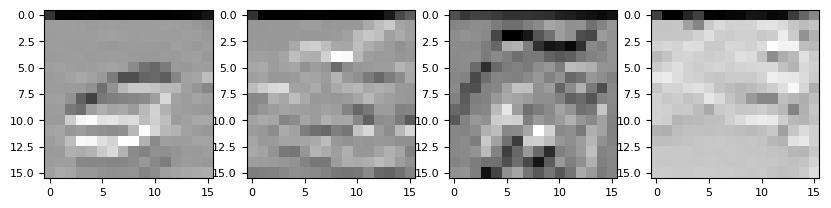

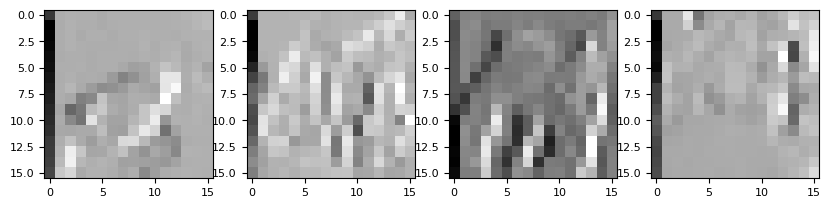

In [174]:
print_iamges(list(result.permute(0,2,3,1).detach().numpy()[:,:,:,0]),1,4,10)
print_iamges(list(result.permute(0,2,3,1).detach().numpy()[:,:,:,1]),1,4,10)
print(f"(n,n) * (f,f): \n[(n+ 2 * padding -f)/stride]+1 = final size.\n\nFor example: \
{x.shape[-2:]} with padding 1 and stride 2 :{result.shape[-2:]} ")

## Convolution over volums


In [180]:
kernel = torch.Tensor([[[[1, 1, 1], [0, 0, 0], [-1, -1, -1]],
                        [[1, 0, -1], [1, 0, -1], [1, 0, -1]],
                        [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]]])
kernel.requires_grad = False


conv = nn.Conv2d(in_channels = 3, out_channels=1, kernel_size=3, stride=1, padding=1, bias=False)

with torch.no_grad():
    conv.weight = nn.Parameter(kernel)

x = v2.Compose([v2.ToTensor()])(torch.tensor(train_x[samples]).permute(0,3,1,2))
result = conv(x.float())

(n,n) * (f,f): 
[(n+ 2 * padding -f)/stride]+1 = final size.

For example: torch.Size([32, 32]) with padding 1 and stride 2 :torch.Size([32, 32]) 


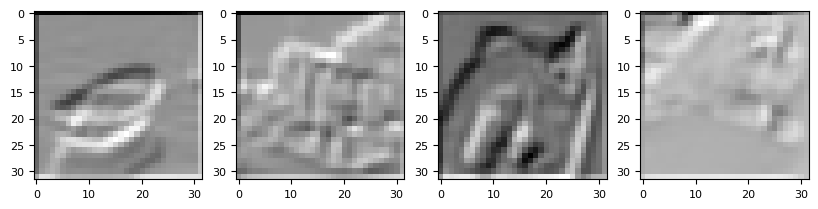

In [181]:
print_iamges(list(result.permute(0,2,3,1).detach().numpy()[:,:,:,:]),1,4,10)
# print_iamges(list(result.permute(0,2,3,1).detach().numpy()[:,:,:,1]),1,4,10)
print(f"(n,n) * (f,f): \n[(n+ 2 * padding -f)/stride]+1 = final size.\n\nFor example: \
{x.shape[-2:]} with padding 1 and stride 2 :{result.shape[-2:]} ")